In [17]:
import pandas as pd
import numpy as np

import os

from class_ import Data
from utils.quantization import quantize
from targets import tg_process

from tqdm.notebook import tqdm
tqdm.pandas()
import scipy
import matplotlib.pyplot as plt

In [33]:
f_matrix = pd.read_parquet("../data/f_matrix.parquet")
b_matrix = pd.read_parquet("../data/b_matrix.parquet")

data = Data(f_matrix = f_matrix, b_matrix = b_matrix)

In [34]:
data.f_matrix

,date,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6
0,2016-02-17,-0.376,-0.699,-0.507,0.4536,-0.0752,-0.2548,-0.191619
1,2016-02-17,-1.121,1.073,0.234,0.4986,0.0022,0.6890,-0.596857
2,2016-02-17,-0.384,-0.097,0.100,0.9720,-0.1626,0.1913,0.562714
3,2016-02-17,-0.343,0.542,0.143,0.1034,-0.6422,-0.1259,0.988381
4,2016-02-17,-0.562,0.137,-0.213,-0.1744,-0.5152,0.0130,-0.602000
...,...,...,...,...,...,...,...,...
50029,2017-01-25,-1.007,0.638,0.940,-0.0046,0.3900,-0.7713,0.752190
50030,2017-01-25,-1.314,0.000,1.711,2.7674,2.8544,-2.7873,1.594667
50031,2017-01-25,-1.124,0.950,1.456,0.4290,0.0460,-0.3703,-0.140476
50032,2017-01-25,-0.432,0.205,1.976,-0.1886,1.1320,-0.0923,0.229143


In [35]:
data.orthogonalize()

0

In [36]:
f0 = data.f_matrix

In [21]:
data.gaussianize()

100%|██████████| 50/50 [00:00<00:00, 1654.31it/s]
/home/jovyan/work/feature-engineering/src/utils/gauss.py:180: UserWarning: Warning: No convergence after 1000 iterations. Increase max_iter.
  warnings.warn("Warning: No convergence after %d iterations. Increase max_iter." % max_iter)
100%|██████████| 7/7 [00:12<00:00,  1.72s/it]


0

In [22]:
data.f_matrix.head()

,date,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6
0,2016-02-17,-0.351441,0.044647,-0.139018,0.016737,-0.010265,0.184375,0.159735
1,2016-02-17,-0.858209,-0.116943,0.757872,-0.086050,-0.004000,0.245014,-0.061648
2,2016-02-17,-0.532395,0.012446,0.170782,0.017934,-0.012348,0.168102,-0.108319
3,2016-02-17,-0.145759,-0.052308,0.146562,0.114401,-0.012690,0.168072,-0.103932
4,2016-02-17,-0.532945,0.095391,-0.261893,-0.050833,-0.005521,-0.228582,-0.029306


In [23]:
f0 =data.f_matrix.feature_0

<AxesSubplot:>

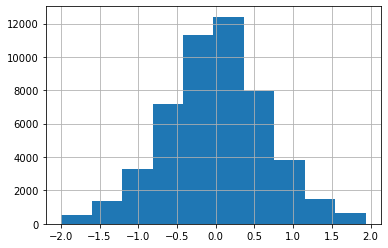

In [25]:
f0.hist(bins)

In [ ]:
tg = pd.read_parquet('../data/target.parquet')